In [4]:
import pandas as pd
import seaborn as sns

In [5]:
df=pd.read_csv("ethnic diversity.csv")
df.head()
# Now find outliers

,Employee_Name,EmpID,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,EmploymentStatus,Department,Salaries,age,Race
0,"Brown, Mia",1103024456,Accountant I,MA,1450,F,Married,US Citizen,Active,Admin Offices,674.28,28,Black or African American
1,"LaRotonda, William",1106026572,Accountant I,MA,1460,M,Divorced,US Citizen,Active,Admin Offices,674.28,50,Black or African American
2,"Steans, Tyrone",1302053333,Accountant I,MA,2703,M,Single,US Citizen,Active,Admin Offices,674.28,43,White
3,"Howard, Estelle",1211050782,Administrative Assistant,MA,2170,F,Married,US Citizen,Terminated for Cause,Admin Offices,47822.00,44,White
4,"Singh, Nan",1307059817,Administrative Assistant,MA,2330,F,Single,US Citizen,Active,Admin Offices,61089.35,33,White


<Axes: >

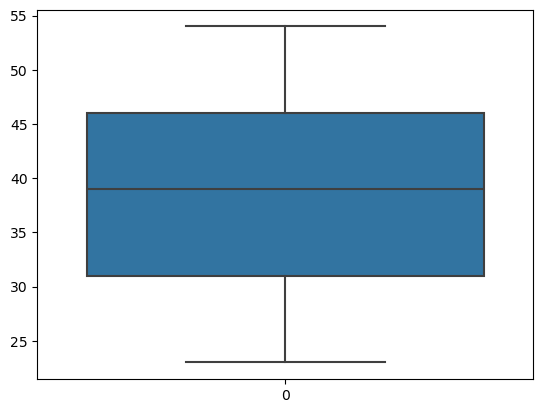

In [11]:
# Let us check the outliers in age column
sns.boxplot(df.age)
# we use boxplot to identify outlies
# There are no outliers

<Axes: >

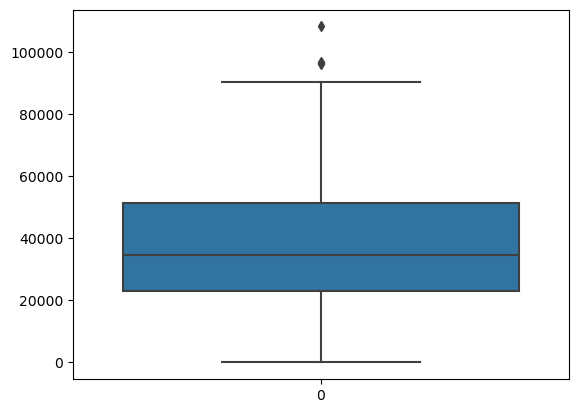

In [13]:
# Let us check the outliers in Salaries column
sns.boxplot(df.Salaries)
# There are outliers
# On right hand side outliers are there

In [14]:
IQR=df.Salaries.quantile(0.75)-df.Salaries.quantile(0.25)

In [15]:
IQR

28359.945

In [29]:
lower_limit=df.Salaries.quantile(0.25)-1.5*IQR
upper_limit=df.Salaries.quantile(0.75)+1.5*IQR

In [30]:
# Now if you check the lower limit of salary
lower_limit
# It is -19446.9675
# There si negative salary so make is as 0
# How to make it  --> go to variable explorer in spyder and make it 0

-19446.9675

In [31]:
upper_limit

93992.8125

In [32]:
# Trimming -->> excludes the outlier values from your analysis.
# trimming is the last option to remove outlier it directly remove the whole row
import numpy as np
outliers_df=np.where(df.Salaries>upper_limit,True,np.where(df.Salaries<lower_limit,True,False))

In [33]:
#you can check outliers_df col in variable explorer

In [34]:
df_trimmed=df.loc[~outliers_df]
df.shape

(310, 13)

In [35]:
df_trimmed.shape

(306, 13)

<Axes: >

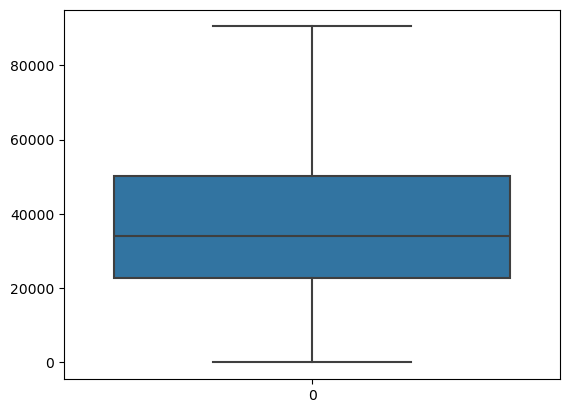

In [38]:
sns.boxplot(df_trimmed.Salaries) #outliers are removed here